# IDR Drop

Implements batch tasks used for IDR drops.

In [12]:
import pandas as pd
import numpy as np
import IDRdrop
import json
import os
print('imported modules successfully.')

imported modules successfully.


# Show downloaded files from EPO portal

Here *filepath* is a directory containing downloaded EPO files. Code will print 20 most recent files.

In [13]:
#readpath = '/home/jupyter-engiela/la-tools-test/IDR_Drop/Raw_IDR'
readpath = "C:\\Users\\wb5888\\Downloads"

myfiles = IDRdrop.show_dir(readpath, 20)
print(myfiles)

files found in dir:  C:\Users\wb5888\Downloads
                                                files                time
0   ngrid_c9c7780d-2cd8-48c6-b616-a9db5f703077_90a... 2019-12-09 15:01:46
1   eversource_bd4ad368-3cdf-4030-9fb2-1d75985c61f... 2019-12-09 10:18:32
2   ngrid_fd5e12df-9d43-486c-b09e-e752a6f3da48_093... 2019-12-06 10:06:50
3   eversource_c4c0c264-83e3-4f3d-85bc-ba35c36c9d9... 2019-12-04 13:40:10
4   ngrid_67be04fc-f33c-44ca-a9cf-4f28b604c8c3_cbe... 2019-12-04 12:51:00
5   eversource_7e35fefe-d832-4662-9099-e8a9807e80d... 2019-12-03 16:00:49
6   ngrid_0fdeff03-3c64-4cc2-8277-a837fe033066_65e... 2019-12-03 08:43:31
7   ngrid_0fdeff03-3c64-4cc2-8277-a837fe033066_bc6... 2019-12-03 08:34:04
8   ngrid_2277d0c9-6a62-4b1b-9c89-26218251e8ec_08e... 2019-12-03 08:08:43
9   20191202133704599000_NEPOOL_COMELEC_1349755004... 2019-12-03 07:38:05
10  20191202133704615000_NEPOOL_COMELEC_1349761004... 2019-12-03 07:37:52
11  ngrid_1f7974eb-4ce3-4c23-809f-214482d91127_de5... 2019-12-02 

Choose files to split into Raw IDR files.

In [14]:
index = [0]

splitfiles = list(myfiles.files[index])
print('files to split: ')
print(splitfiles)

files to split: 
['ngrid_c9c7780d-2cd8-48c6-b616-a9db5f703077_90a369db_hourlycsv.csv']


## Batch process downloaded EPO files into Raw IDRs

In [15]:
readpath = "C:\\Users\\wb5888\\Downloads"
writepath = "C:\\Users\\wb5888\\la-tools-test\IDR_Drop\Raw_IDR"
utility = 'MECO'
#accts = ['29574490016', '29180880014']
accts = None

for file in splitfiles:
    os.chdir(readpath)
    filedf = pd.read_csv(file, sep = ",", header = 0)
    
    IDRdrop.raw_split(filedf, readpath, writepath, utility, accts)

found 4 accounts.
MECO_2692437015_IDR_RAW.csv  written.
MECO_5257822017_IDR_RAW.csv  written.
MECO_6285403014_IDR_RAW.csv  written.
MECO_8779588017_IDR_RAW.csv  written.


In [30]:
readpath = "C:\\Users\\wb5888\\Downloads"
writepath = "C:\\Users\\wb5888\\la-tools-test\IDR_Drop\RAW_IDR"
utility = 'BECO'
accts = ['25593531004', '25917091008', '27266900011']

error_log = []

for file in splitfiles:
    try:
        os.chdir(readpath)
        filedf = pd.read_csv(file, sep = ",", header = 0)
    
        IDRdrop.raw_split(filedf, readpath, writepath, utility, accts)
        print('success, file: ', file)
        
    except:
        error_log = error_log.append(file)
        print('error, file: ', file)

found 3 accounts.
success, file:  eversource_eceb5f43-46a8-4ffa-9695-951e6791f706_4085ad25_hourlycsv.csv


## Show Raw IDR files based on utility

Here *rawpath* is directory containing Raw IDRs - 25 most recent will be shown.

In [16]:
rawfiles = IDRdrop.show_dir(writepath, 20)
print(rawfiles)

files found in dir:  C:\Users\wb5888\la-tools-test\IDR_Drop\Raw_IDR
                                      files                time
0               MECO_8779588017_IDR_RAW.csv 2019-12-09 15:02:05
1               MECO_2692437015_IDR_RAW.csv 2019-12-09 15:02:05
2               MECO_5257822017_IDR_RAW.csv 2019-12-09 15:02:05
3               MECO_6285403014_IDR_RAW.csv 2019-12-09 15:02:05
4           COMELEC_15783120023_IDR_RAW.csv 2019-12-09 10:19:10
5           COMELEC_15781150022_IDR_RAW.csv 2019-12-09 10:19:10
6                NRI_5332806000_IDR_RAW.csv 2019-12-06 10:07:21
7   WMECO_54465494094_257741006_IDR_RAW.csv 2019-12-04 13:40:30
8   WMECO_54541594040_612031006_IDR_RAW.csv 2019-12-04 13:40:30
9               MECO_6466260020_IDR_RAW.csv 2019-12-04 12:51:52
10             CMP_035016252757_IDR_RAW.csv 2019-12-04 08:13:35
11    CLP_51296796071_582453006_IDR_RAW.csv 2019-12-03 16:04:58
12             MECO_1403187030B_IDR_RAW.csv 2019-12-03 08:44:18
13             MECO_1403187030A_IDR_

Choose Raw IDRs to filter into IDR files.

In [18]:
index = [3]

processfiles = rawfiles.files[:4]
files = list(processfiles)
print('files to process: ')
print(processfiles)

files to process: 
0    MECO_8779588017_IDR_RAW.csv
1    MECO_2692437015_IDR_RAW.csv
2    MECO_5257822017_IDR_RAW.csv
3    MECO_6285403014_IDR_RAW.csv
Name: files, dtype: object


## Batch filter Raw IDR into IDR files to be dropped

In [19]:
#writepath = '/home/jupyter-engiela/la-tools-test/IDR_Drop/IDR'
readpath = "C:\\Users\\wb5888\\la-tools-test\IDR_Drop\RAW_IDR"
writepath = 'C:\\Users\wb5888\la-tools-test\IDR_Drop\IDR'
error_log = []

for dropfile in files:
    try:
        IDRdrop.data_drop(dropfile, readpath, writepath)
        print('success, file: ', dropfile)
    
    except:
        try:
            error_log = error_log.append(dropfile)
            print("error, file: ", dropfile)
        except:
            pass

success, file:  MECO_8779588017_IDR_RAW.csv
success, file:  MECO_2692437015_IDR_RAW.csv
success, file:  MECO_5257822017_IDR_RAW.csv
success, file:  MECO_6285403014_IDR_RAW.csv


In [12]:
type(error_log)
error_log

[]

### Change meters to vertical

In [20]:
#data_dir = '/home/jupyter-engiela/la-tools-test/IDR_Drop/IDR'
data_dir = 'C:\\Users\wb5888\la-tools-test\IDR_Drop\IDR'
os.chdir(data_dir)
idr = IDRdrop.show_dir(data_dir, 10)
idr

files found in dir:  C:\Users\wb5888\la-tools-test\IDR_Drop\IDR


,files,time
0,MECO_5257822017_IDR.csv,2019-12-09 15:02:22
1,MECO_2692437015_IDR.csv,2019-12-09 15:02:22
2,MECO_6285403014_IDR.csv,2019-12-09 15:02:22
3,MECO_8779588017_IDR.csv,2019-12-09 15:02:22
4,COMELEC_15783120023_IDR_vert.csv,2019-12-09 10:56:25
5,COMELEC_15781150022_IDR_vert.csv,2019-12-09 10:56:19
6,COMELEC_15781150022_IDR.csv,2019-12-09 10:19:27
7,COMELEC_15783120023_IDR.csv,2019-12-09 10:19:27
8,NRI_5332806000_IDR_vert.csv,2019-12-06 10:07:47
9,NRI_5332806000_IDR.csv,2019-12-06 10:07:35


In [21]:
myfiles = idr.files[:4]
myfiles

0    MECO_5257822017_IDR.csv
1    MECO_2692437015_IDR.csv
2    MECO_6285403014_IDR.csv
3    MECO_8779588017_IDR.csv
Name: files, dtype: object

In [22]:
for f in myfiles:
    IDRdrop.hor_to_vert(f)

transformed and wrote MECO_5257822017_IDR.csv to MECO_5257822017_IDR_vert.csv.
transformed and wrote MECO_2692437015_IDR.csv to MECO_2692437015_IDR_vert.csv.
transformed and wrote MECO_6285403014_IDR.csv to MECO_6285403014_IDR_vert.csv.
transformed and wrote MECO_8779588017_IDR.csv to MECO_8779588017_IDR_vert.csv.


## Read horizontal

In [63]:
hor = pd.read_csv(idr.files[1])
hor.head()

,Account,Date,Channel,Units,1:00,2:00,3:00,4:00,5:00,6:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,24:00
0,1555430004 IDEAL CONCRETE BLOCK,9/17/2018,1 kWh,kWh,16.74,16.50,18.24,26.82,70.14,136.68,...,282.42,162.06,114.84,70.98,55.02,66.06,58.56,56.88,59.28,58.02
1,1555430004 IDEAL CONCRETE BLOCK,9/18/2018,1 kWh,kWh,34.86,39.48,45.18,31.80,84.00,126.84,...,196.62,140.88,117.60,57.18,52.32,53.88,54.72,54.00,56.16,54.84
2,1555430004 IDEAL CONCRETE BLOCK,9/19/2018,1 kWh,kWh,31.80,24.90,36.00,35.46,87.96,133.92,...,236.22,145.26,113.16,66.54,54.30,50.94,52.20,51.24,51.72,50.40
3,1555430004 IDEAL CONCRETE BLOCK,9/20/2018,1 kWh,kWh,29.40,24.06,37.86,35.88,77.52,146.52,...,263.10,196.26,121.50,80.10,75.12,77.28,75.96,74.82,53.16,53.22
4,1555430004 IDEAL CONCRETE BLOCK,9/21/2018,1 kWh,kWh,51.42,50.58,28.62,23.58,78.66,150.12,...,114.66,85.32,22.50,16.32,14.94,15.84,16.62,16.26,16.80,16.32


## Read vertical

In [64]:
def read_ts(file):
    ver = pd.read_csv(file, header = None)

    ver.columns = ['t', 'v']
    ver['t'] = pd.to_datetime(ver['t'])
    ver.set_index('t', drop = True, inplace = True)
    return(ver)

In [65]:
my_ts = read_ts(idr.files[0])

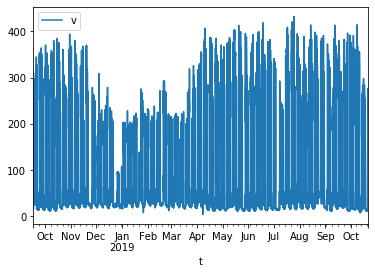

In [66]:
my_ts.plot(y = 'v')

In [ ]:
my_ts.to_csv('')